# Analysis of the relationship between cigarette sales per capita and median income by States in the US
by Group 14 (Zilin Zhang, Jiangyue Chen, Daniel Jang, Isabel Adelhardt)

## Introduction of Project

Introduction... + purpose of analysis (?)

## Data sources

data sources
(need to mention the missing 2015 sales data)

## Hypothesis: Whether median income per state has an impact to sales of cigarette per capita

In order to examine our assumption, we think the following data analysis are essential:

1. plot and analyze the changing trend of cigarette sales per capita in each states in the U.S. from 2013 to 2019
2. plot and analyze the changing trend of median income in each states in the U.S. from 2013 to 2019
   
   · if each state has a +/- difference in median income between years does this relate to the difference in sales

3. regression plot for the sales data and median income in each state per year to figure out the relationship of two variables

In [1]:
import pandas as pd
from IPython.display import Image

## Raw Data Preprocessing 


For the data we acquire from --- about U.S. Chronic Disease Indicators 

In [2]:
sales_DATA = pd.read_csv("data/U.S._Chronic_Disease_Indicators__Tobacco.csv", low_memory=False)

# sales for each state in years from 2013 to 2019
# filter question
states_sales = sales_DATA[sales_DATA["Question"] == "Sale of cigarette packs"]
# filter columns
states_sales = states_sales[['YearStart', 'LocationAbbr', 'LocationDesc', 'Question', 'DataValueUnit', 'DataValue']]
states_sales = states_sales.groupby(['YearStart', 'LocationDesc']).sum().reset_index()
# remove states GU, PR, US, VI since they are not actual states.
states_sales = states_sales.loc[states_sales['DataValue'] != 0.0]

# len(states_sales.LocationAbbr.unique())
states_sales

,YearStart,LocationDesc,LocationAbbr,Question,DataValueUnit,DataValue
0,2013,Alabama,AL,Sale of cigarette packs,pack sales per capita,64.6
1,2013,Alaska,AK,Sale of cigarette packs,pack sales per capita,39
2,2013,Arizona,AZ,Sale of cigarette packs,pack sales per capita,24.4
3,2013,Arkansas,AR,Sale of cigarette packs,pack sales per capita,57.5
4,2013,California,CA,Sale of cigarette packs,pack sales per capita,23.9
...,...,...,...,...,...,...
325,2019,Virginia,VA,Sale of cigarette packs,pack sales per capita,51.6
326,2019,Washington,WA,Sale of cigarette packs,pack sales per capita,15
327,2019,West Virginia,WV,Sale of cigarette packs,pack sales per capita,75
328,2019,Wisconsin,WI,Sale of cigarette packs,pack sales per capita,35.4


In [3]:
sales_DATA.shape

(59396, 33)

## Exploratory Data Analysis

### Step 1: Plot and analysis the trend of cigarette sales per capita in each state in the U.S per year from 2013-2019

In this very first step, we want to figure out the general changing trend of cigarette sales per capita in each state in the U.S. from 2013 to 2019, in order to compare with the change in media income. 

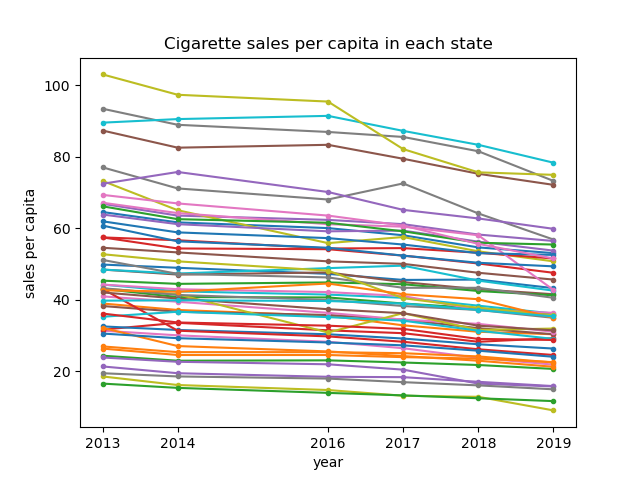

In [6]:
Image("output/sales-of-cigarette-each-state.png")

Firstly, in order to best present the change, we decided to use line charts to show the change in cigarette sales per capita in each state from 2013 to 2019. Moreover, as the data in 2015 in the original source is missing, we then decided to skip this year.

In general, from the line chart with 51 lines presenting the changing trend of cigarette sales in 51 states from 2013 to 2019, we can clearly see that the general trend of cigarette sales in each state is decreasing. Even though some states experienced fluctuation, the general trend in every state is still decreasing. 

### Step 2: Median income in each state per year from 2013 - 2019

Reading in median income data which is from Source: U.S. Bureau of the Census, Current Population Survey, Annual Social and Economic Supplements. For information on confidentiality protection, sampling error, nonsampling error, and definitions, see <www2.census.gov/programs-surveys/cps/techdocs/cpsmar19.pdf>.



We are using 2017 Median income instead of 2017(40) because 2017(40) represents data from a new data processing system. The 2017(40) data should be used for analysis of median income after 2017, but our analysis relates mostly to before 2017.

We are using 2013(38) beause 2013(39) represents data from individuals who received new income questions. These new income questions were not used in the following years, so we are disregarding this data. 

In [4]:
median_DATA = pd.read_csv('data/median_income.csv')
cols_drop = median_DATA.columns[median_DATA.columns.str.contains("Standard")]
median_income = median_DATA.drop(columns=cols_drop).set_index("Location")

#drop 2017(40) and 2013(39)
median_income = median_income.drop(median_income.columns[[0, 1, 4, 9]], axis = 1)
median_income.head()

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "District of Columbia": "DC",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}


ddf = median_income.reset_index().copy()

ddf.iloc[:, 1:len(ddf)] = ddf.iloc[:, 1:len(ddf)].replace(',','', regex=True).astype(float)
ddf["avg_med_income"] = ddf.iloc[:, 1:len(ddf)].mean(axis = 1)

#Abbreviate the States for plotly geographical mapping
ddf["state"] =  ddf["Location"]
ddf = ddf.replace({"state": us_state_to_abbrev}).drop(0)
ddf.head()


,Location,2019 Median income,2018 Median income,2017 Median income,2016 Median income,2015 Median income,2014 Median income,2013 (38) Median income,avg_med_income,state
1,Alabama,56200.0,49936.0,51113.0,47221.0,44509.0,42278.0,41381.0,47519.714286,AL
2,Alaska,78394.0,68734.0,72231.0,75723.0,75112.0,67629.0,61137.0,71280.000000,AK
3,Arizona,70674.0,62283.0,61125.0,57100.0,52248.0,49254.0,50602.0,57612.285714,AZ
4,Arkansas,54539.0,49781.0,48829.0,45907.0,42798.0,44922.0,39919.0,46670.714286,AR
5,California,78105.0,70489.0,69759.0,66637.0,63636.0,60487.0,57528.0,66663.000000,CA


- map plot/ bar plot
- sum sales for 7 years/7 = avg sales per year for each state

In [8]:
median_income.head()

,2019 Median income,2018 Median income,2017 Median income,2016 Median income,2015 Median income,2014 Median income,2013 (38) Median income
Location,,,,,,,
United States,"68,703","63,179","61,372","59,039","56,516","53,657","51,939"
Alabama,"56,200","49,936","51,113","47,221","44,509","42,278","41,381"
Alaska,"78,394","68,734","72,231","75,723","75,112","67,629","61,137"
Arizona,"70,674","62,283","61,125","57,100","52,248","49,254","50,602"
Arkansas,"54,539","49,781","48,829","45,907","42,798","44,922","39,919"


- map plot
- average median income for each state from 2013 - 2019

### Step 3: Regression

## Conclusion

## Author Contribution